## Data Decription
### Body signal of smoking

This dataset is a collection of basic health biological signal data.
The goal is to determine the presence or absence of smoking through bio-signals.

Features of dataset: 
* ID : serial number given to a person. (I already drop this column.) 
* gender: the gender of a person being either female or male. 
* age : 5-years gap age groups. 
* height(cm) 
* weight(kg)
* waist(cm) : Waist circumference length 
* eyesight(left): Denoted by a value between 0.1-2.5, or 9.9 
* eyesight(right): Denoted by a value between 0.1-2.5, or 9.9 
* hearing(left): hearing of the person's ear (1 - normal, 2 - abnormal) 
* hearing(right): hearing of the person's ear (1 - normal, 2 - abnormal) 
* systolic : blood pressure. 
* relaxation : blood pressure. 
* fasting blood sugar: blood sugar before meals level 
* Cholesterol : total 
* triglyceride 
* HDL : cholesterol type 
* LDL : cholesterol type 
* hemoglobin 
* Urine protein 
* serum creatinine 
* AST : glutamic oxaloacetic transaminase type 
* ALT : glutamic oxaloacetic transaminase type 
* Gtp : γ-GTP 
* oral : Oral Examination status (s whether the examinee accepted the oral examination). 
* dental caries 
* tartar : tartar status 
* TARGET VARIABLE: smoking: smoking status of a person (1 - smoking, 0 - non-smoking) 

In [232]:
#Neccesary libraries below:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(transform_output="pandas")  
from sklearn.preprocessing import MinMaxScaler
import warnings

In [233]:
warnings.filterwarnings('ignore')

In [243]:
df=pd.read_csv("../datasets/smoking.csv")
df.drop("ID",axis=1, inplace=True)
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


I have brought the property names to the appropriate format to be able to process more easily:

In [4]:
df.rename(columns = {"height(cm)" : "height", "weight(kg)" : "weight",
                     "waist(cm)" : "waist", "eyesight(left)" : "eyesight_left",
                     "eyesight(right)" : "eyesight_right", "hearing(left)" : "hearing_left",
                     "hearing(right)" : "hearing_right", "fasting blood sugar" : "fasting_blood_sugar",
                     "Cholesterol" : "cholesterol", "HDL" : "hdl", "LDL" : "ldl",
                     "Urine protein" : "urine_protein", "serum creatinine" : "serum_creatinine",
                     "AST" : "ast", "ALT" : "alt", "Gtp" : "gtp", "dental caries" : "dental_caries"},
          inplace = True)

The following lines of code to recognize the data: 

In [5]:
df.shape #Give info our data shape 

(55692, 26)

In [6]:
df.info() # This code gives column names and information about include non variables or not and additionally give features dtype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height               55692 non-null  int64  
 3   weight               55692 non-null  int64  
 4   waist                55692 non-null  float64
 5   eyesight_left        55692 non-null  float64
 6   eyesight_right       55692 non-null  float64
 7   hearing_left         55692 non-null  float64
 8   hearing_right        55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting_blood_sugar  55692 non-null  float64
 12  cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  hdl                  55692 non-null  float64
 15  ldl                  55692 non-null 

In [7]:
df.describe().round(2)
#.describe() function provides Measures of Location like count, mean,min, Q1, Q2, Q3, max values of numeric data on our dataset.

,age,height,weight,waist,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,...,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,smoking
count,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,...,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00,55692.00
mean,44.18,164.65,65.86,82.05,1.01,1.01,1.03,1.03,121.49,76.00,...,57.29,114.96,14.62,1.09,0.89,26.18,27.04,39.95,0.21,0.37
std,12.07,9.19,12.82,9.27,0.49,0.49,0.16,0.16,13.68,9.68,...,14.74,40.93,1.56,0.40,0.22,19.36,30.95,50.29,0.41,0.48
min,20.00,130.00,30.00,51.00,0.10,0.10,1.00,1.00,71.00,40.00,...,4.00,1.00,4.90,1.00,0.10,6.00,1.00,1.00,0.00,0.00
25%,40.00,160.00,55.00,76.00,0.80,0.80,1.00,1.00,112.00,70.00,...,47.00,92.00,13.60,1.00,0.80,19.00,15.00,17.00,0.00,0.00
50%,40.00,165.00,65.00,82.00,1.00,1.00,1.00,1.00,120.00,76.00,...,55.00,113.00,14.80,1.00,0.90,23.00,21.00,25.00,0.00,0.00
75%,55.00,170.00,75.00,88.00,1.20,1.20,1.00,1.00,130.00,82.00,...,66.00,136.00,15.80,1.00,1.00,28.00,31.00,43.00,0.00,1.00
max,85.00,190.00,135.00,129.00,9.90,9.90,2.00,2.00,240.00,146.00,...,618.00,1860.00,21.10,6.00,11.60,1311.00,2914.00,999.00,1.00,1.00


I tried to analyze the data by separating it as X_train and X_test from the beginning, but since the oral attribute contains only one value, it will not have a value for our model, so I removed it directly from the dataset.

In [8]:
df.oral.value_counts() 

Y    55692
Name: oral, dtype: int64

In [9]:
df.isnull().sum()

gender                 0
age                    0
height                 0
weight                 0
waist                  0
eyesight_left          0
eyesight_right         0
hearing_left           0
hearing_right          0
systolic               0
relaxation             0
fasting_blood_sugar    0
cholesterol            0
triglyceride           0
hdl                    0
ldl                    0
hemoglobin             0
urine_protein          0
serum_creatinine       0
ast                    0
alt                    0
gtp                    0
oral                   0
dental_caries          0
tartar                 0
smoking                0
dtype: int64

In [10]:
df.drop("oral",axis=1, inplace=True)


As a mention about below, I pre-separated the data as train and test and performed all my analysis on the train to avoid data leakage.

In [11]:
X = df[df.columns[:-1]]
y = df[["smoking"]]

We need to set the "stratify" method in order to separate the 1 and 0 values of our target variable as train and test, as in the case when our data set comes to us, as the y value.

In [12]:
X_train_val_first, X_test_first, y_train_val, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1404, stratify=y)

As I mentioned in Readme, I copied some of the correlation calculations I included as a result of my research that I was not sure about, and as a result, I would not include some data during model training, so I copied the first version of the data set.

In [13]:
X_train_val=X_train_val_first.copy()
X_test=X_test_first.copy()

In order to better distinguish between categorical and numeric variables,
I ran the code to calculate the value_count of the features in my dataset:

In [14]:
for column in X_train_val.columns:
    print("Feature: ", column, ", value Counts: ",len(df[column].value_counts()))


Feature:  gender , value Counts:  2
Feature:  age , value Counts:  14
Feature:  height , value Counts:  13
Feature:  weight , value Counts:  22
Feature:  waist , value Counts:  566
Feature:  eyesight_left , value Counts:  19
Feature:  eyesight_right , value Counts:  17
Feature:  hearing_left , value Counts:  2
Feature:  hearing_right , value Counts:  2
Feature:  systolic , value Counts:  130
Feature:  relaxation , value Counts:  95
Feature:  fasting_blood_sugar , value Counts:  276
Feature:  cholesterol , value Counts:  286
Feature:  triglyceride , value Counts:  390
Feature:  hdl , value Counts:  126
Feature:  ldl , value Counts:  289
Feature:  hemoglobin , value Counts:  145
Feature:  urine_protein , value Counts:  6
Feature:  serum_creatinine , value Counts:  38
Feature:  ast , value Counts:  219
Feature:  alt , value Counts:  245
Feature:  gtp , value Counts:  488
Feature:  dental_caries , value Counts:  2
Feature:  tartar , value Counts:  2


As you can see above, most features of our data, which contains approximately 56 thousand data, seem to be categorical. Let's take a look at these:

Even though the continuous values for 55 thousand data are not very continuous and are distributed in a certain interval, I took the numerically increasing or decreasing values such as length, age, weight, eye number as continuous. I accepted the other values as categorical and acted accordingly.

#### Categorical Variables: 

In [15]:
X_train_val["dental_caries"].value_counts()

0    35113
1     9440
Name: dental_caries, dtype: int64

In [16]:
X_train_val["tartar"].value_counts()

Y    24763
N    19790
Name: tartar, dtype: int64

In [17]:
X_train_val.gender.value_counts()

M    28327
F    16226
Name: gender, dtype: int64

In [18]:
X_train_val.urine_protein.value_counts()

1.0    42076
2.0     1433
3.0      749
4.0      213
5.0       75
6.0        7
Name: urine_protein, dtype: int64

In [19]:
X_train_val.hearing_left.value_counts()

1.0    43402
2.0     1151
Name: hearing_left, dtype: int64

In [20]:
X_train_val.hearing_right.value_counts()

1.0    43377
2.0     1176
Name: hearing_right, dtype: int64

#### Numeric Variables: 

In [21]:
X_train_val.serum_creatinine.value_counts()

0.9     8981
0.8     8406
1.0     7813
0.7     5925
1.1     4979
0.6     3601
1.2     2322
0.5     1206
1.3      704
1.4      239
0.4      167
1.5       81
1.6       31
0.1       21
1.7       15
1.8       12
0.3       10
2.0        8
1.9        6
2.1        4
2.5        2
7.4        2
10.0       2
2.6        2
3.4        2
0.2        2
3.2        1
7.5        1
2.2        1
3.0        1
2.3        1
9.9        1
11.6       1
10.3       1
5.0        1
6.4        1
Name: serum_creatinine, dtype: int64

In [22]:
X_train_val.age.value_counts()

40    12120
45     5662
60     4942
50     4435
55     3951
35     3625
30     3237
25     2832
20     1259
65     1093
70      678
75      477
80      232
85       10
Name: age, dtype: int64

In [23]:
X_train_val.weight.value_counts()

65     6554
60     6488
70     6170
55     5843
75     4845
50     4517
80     3317
85     1993
45     1915
90     1167
95      649
40      375
100     342
105     173
110      96
115      44
35       27
120      20
30        7
125       7
130       3
135       1
Name: weight, dtype: int64

In [24]:
X_train_val.height.value_counts()

170    9035
165    7961
160    7149
175    6405
155    6132
150    3577
180    2546
145    1008
185     543
140     161
190      30
135       5
130       1
Name: height, dtype: int64

In [25]:
X_train_val.fasting_blood_sugar.value_counts()

94.0     1802
97.0     1737
92.0     1732
93.0     1719
91.0     1698
         ... 
375.0       1
294.0       1
363.0       1
263.0       1
318.0       1
Name: fasting_blood_sugar, Length: 267, dtype: int64

In [26]:
X_train_val.eyesight_right.value_counts()

1.2    10034
1.0     9958
1.5     6065
0.8     4312
0.9     4211
0.7     3462
0.6     1936
0.5     1721
0.4     1064
0.3      679
0.2      423
2.0      301
0.1      289
9.9       73
1.6       17
1.3        6
1.1        2
Name: eyesight_right, dtype: int64

In [27]:
X_train_val.eyesight_left.value_counts()

1.2    10221
1.0     9755
1.5     6265
0.8     4241
0.9     4079
0.7     3604
0.6     1939
0.5     1672
0.4      984
0.3      712
0.2      370
2.0      323
0.1      286
9.9       71
1.6       17
1.3        9
1.9        2
1.1        2
1.8        1
Name: eyesight_left, dtype: int64

Instead of taking the eye number as two features, right and left, I took the average and reduced it to a single feature:

In [28]:
X_train_val["eyesight"] = (X_train_val["eyesight_left"] + X_train_val["eyesight_right"])/2.0
X_train_val.drop(['eyesight_left', 'eyesight_right'], axis = 1, inplace = True)

X_test["eyesight"] = (X_test["eyesight_left"] + X_test["eyesight_right"])/2.0
X_test.drop(['eyesight_left', 'eyesight_right'], axis = 1, inplace = True)

In [29]:
X_train_val.eyesight.value_counts()

1.20    5129
1.10    4868
1.00    4649
1.50    3427
1.35    3242
0.90    2855
0.95    2577
0.80    2223
0.75    1852
0.70    1762
1.25    1252
1.05    1160
0.85    1157
0.85    1068
0.60     998
0.55     972
0.50     837
0.65     824
0.65     504
0.40     455
0.45     395
0.35     308
1.75     271
0.30     196
1.15     183
0.25     178
0.60     176
0.45     162
0.90     148
0.20     137
2.00     136
0.30      80
0.10      68
1.60      54
0.15      44
0.40      42
5.45      29
5.30      17
5.70      17
5.25      15
1.30      11
5.35      10
1.40       9
5.55       9
9.90       8
5.00       8
5.20       7
5.40       7
5.05       4
5.10       3
1.55       2
1.45       2
1.80       2
5.15       1
5.95       1
1.55       1
1.45       1
Name: eyesight, dtype: int64

In [30]:
print("Feature: eyesight, Value Counts: ",len( X_train_val["eyesight"].value_counts()))

Feature: eyesight, Value Counts:  57


In [31]:
X_train_val.columns

Index(['gender', 'age', 'height', 'weight', 'waist', 'hearing_left',
       'hearing_right', 'systolic', 'relaxation', 'fasting_blood_sugar',
       'cholesterol', 'triglyceride', 'hdl', 'ldl', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'ast', 'alt', 'gtp',
       'dental_caries', 'tartar', 'eyesight'],
      dtype='object')

### OVERALL
*  #### Categorical Variables are:
   * gender binary
   * hearing_left binary
   * hearing_right binary
   * urine_protein non-binary 6 different value
   * dental_caries -binary
   * tartar -binary
* #### Numerice Variables are: 
  * age
  * height
  * weight
  * waist
  * systolic
  * relaxation
  * fasting_blood_sugar
  * cholesterol
  * triglyceridehdl
  * ldl
  * ast
  * alt
  * gtp
  * hemoglobin
  * eyesight
  * serum_creatinine

In [32]:
X_train_cat= X_train_val[['gender','hearing_left','hearing_right','dental_caries','tartar',"urine_protein"]]

urine_protein is not binary variable so: 

In [33]:
X_train_binary=X_train_val[['gender','hearing_left','hearing_right','dental_caries','tartar']]

Remember Pearson correlation takes only numerical values: 

In [34]:
X_train_for_corr=X_train_val[['age', 'height', 'weight', 'waist', 'systolic', 'relaxation',
       'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl','ast', 'alt', 'gtp',
       'hemoglobin','eyesight','serum_creatinine']]

In [35]:
X_train_for_corr.corr().style.background_gradient(cmap = "Blues")

,age,height,weight,waist,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,ast,alt,gtp,hemoglobin,eyesight,serum_creatinine
age,1.000000,-0.477669,-0.324395,-0.028412,0.136402,0.052606,0.179312,0.052282,0.015028,0.007601,0.040137,0.029323,-0.061486,0.012587,-0.262239,-0.241458,-0.101522
height,-0.477669,1.000000,0.675981,0.380377,0.078341,0.109826,0.023765,-0.080377,0.156174,-0.211735,-0.046424,0.042300,0.119733,0.136414,0.539737,0.185881,0.375657
weight,-0.324395,0.675981,1.000000,0.823492,0.266215,0.271851,0.138175,0.026728,0.320874,-0.356600,0.039404,0.114592,0.234951,0.204127,0.491823,0.133756,0.317910
waist,-0.028412,0.380377,0.823492,1.000000,0.317291,0.294494,0.211636,0.064891,0.359689,-0.374016,0.069774,0.136885,0.238132,0.238747,0.386505,0.038485,0.230525
systolic,0.136402,0.078341,0.266215,0.317291,1.000000,0.761807,0.168501,0.060891,0.196619,-0.086839,0.017525,0.079874,0.088317,0.160325,0.185789,-0.022539,0.072928
relaxation,0.052606,0.109826,0.271851,0.294494,0.761807,1.000000,0.146069,0.098971,0.215562,-0.087416,0.042159,0.083594,0.101585,0.174728,0.232361,0.010848,0.083085
fasting_blood_sugar,0.179312,0.023765,0.138175,0.211636,0.168501,0.146069,1.000000,0.007351,0.226286,-0.123416,-0.021639,0.065285,0.080069,0.181521,0.104339,-0.051789,0.041785
cholesterol,0.052282,-0.080377,0.026728,0.064891,0.060891,0.098971,0.007351,1.000000,0.249423,0.167705,0.721065,0.021987,0.045341,0.085013,0.066890,-0.004360,0.000972
triglyceride,0.015028,0.156174,0.320874,0.359689,0.196619,0.215562,0.226286,0.249423,1.000000,-0.405284,0.025395,0.097224,0.163755,0.298956,0.273507,0.024049,0.122982
hdl,0.007601,-0.211735,-0.356600,-0.374016,-0.086839,-0.087416,-0.123416,0.167705,-0.405284,1.000000,-0.055189,-0.035786,-0.119630,-0.051607,-0.238241,-0.020518,-0.171792


When we look at the table, those with a correlation value above 0.80 may be linearly dependent on each other, therefore they are related, and if one is removed, more appropriate steps can be taken. I have to choose between weight and waist.
\
Considering that the waist length is really proportional to the weight, I want to make a more general examination by keeping the weight and dropping the waist feature.

In [36]:
X_train_val.drop(['waist'], axis = 1, inplace = True)
X_test.drop(['waist'], axis = 1, inplace = True)

[Text(0.5, 1.0, 'Frequency of hearing right')]

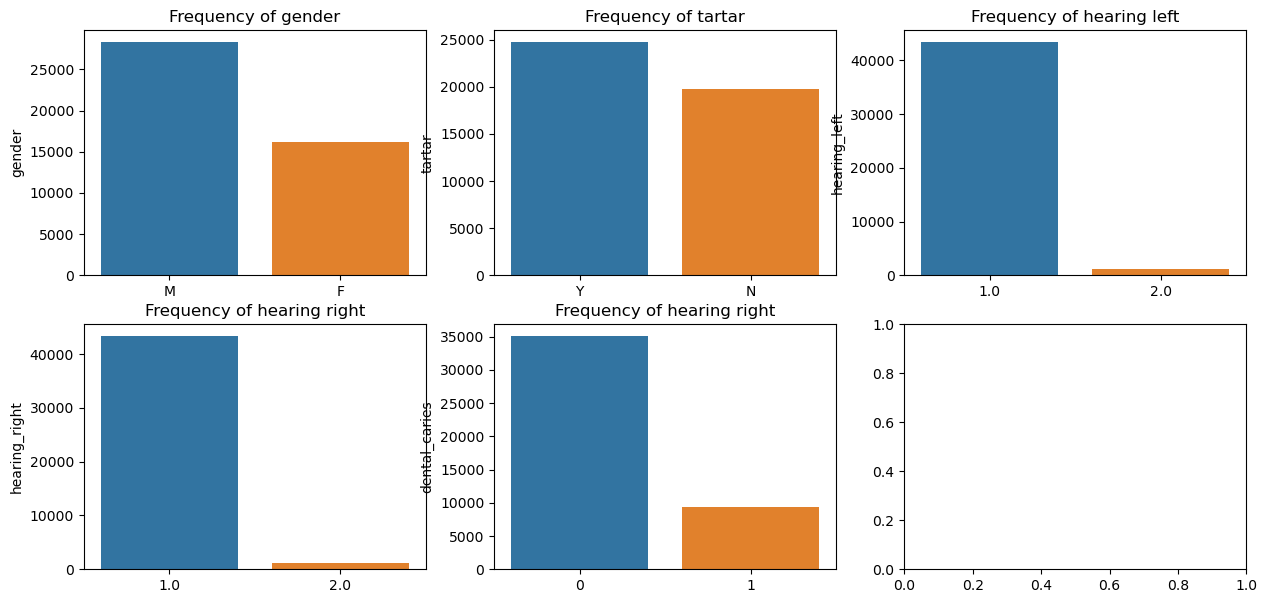

In [37]:
fig, axes = plt.subplots(2, 3, figsize = (15,7))
axes = axes.flatten()
sns.barplot(ax=axes[0], data=X_train_val, x=X_train_val.gender.value_counts().index, y=X_train_val.gender.value_counts()).set(title="Frequency of gender")
sns.barplot(ax=axes[1], data=X_train_val, x=X_train_val.tartar.value_counts().index, y=X_train_val.tartar.value_counts()).set(title="Frequency of tartar")
sns.barplot(ax=axes[2], data=X_train_val, x=X_train_val.hearing_left.value_counts().index, y=X_train_val.hearing_left.value_counts()).set(title="Frequency of hearing left")
sns.barplot(ax=axes[3], data=X_train_val, x=X_train_val.hearing_right.value_counts().index, y=X_train_val.hearing_right.value_counts()).set(title="Frequency of hearing right")
sns.barplot(ax=axes[4], data=X_train_val, x=X_train_val.dental_caries.value_counts().index, y=X_train_val.dental_caries .value_counts()).set(title="Frequency of hearing right")


## Chi-Square Test

I thought there would be a correlation between each other as there would be too many categorical variables. I looked at how I could test this between categorical values and found the Chi-Square test!
\
**A chi-squared test**, also known as a chi-square or χ2 test, is a statistical method used to analyze contingency tables when dealing with large sample sizes. It is used to determine whether two categorical variables, represented as dimensions in a contingency table, are independent in influencing the test statistic. This test is only valid when the test statistic follows a chi-squared distribution under the null hypothesis, such as Pearson's chi-squared test and its variations. Specifically, Pearson's chi-squared test is used to determine if there is a significant difference between the expected and observed frequencies in one or more categories of a contingency table. You find see more this link [Chi-Square Test](https://en.wikipedia.org/wiki/Chi-squared_test)

In [38]:
from scipy.stats import chi2_contingency
all_results=pd.DataFrame(index=X_train_binary.columns)
col_list=list()
for binary_var in X_train_binary.columns:
    print(binary_var)
    col_list=[]
    for otherbinary_var in X_train_binary.columns:
        
        CrosstabResult=pd.crosstab(index=X_train_val[binary_var],columns=X_train_val[otherbinary_var])
        #print(CrosstabResult)
        ChiSqResult = chi2_contingency(CrosstabResult)
        col_list.append(ChiSqResult[1])
        #print('The P-Value of the ChiSq Test is:', ChiSqResult[1])
    all_results[binary_var]=col_list
all_results

gender
hearing_left
hearing_right
dental_caries
tartar


,gender,hearing_left,hearing_right,dental_caries,tartar
gender,0.000000e+00,3.870523e-02,5.529737e-02,2.914939e-70,8.941975e-31
hearing_left,3.870523e-02,0.000000e+00,0.000000e+00,1.735842e-04,1.283245e-14
hearing_right,5.529737e-02,0.000000e+00,0.000000e+00,4.114690e-03,1.079230e-08
dental_caries,2.914939e-70,1.735842e-04,4.114690e-03,0.000000e+00,5.127880e-297
tartar,8.941975e-31,1.283245e-14,1.079230e-08,5.127880e-297,0.000000e+00


If the given p probability value is less than 0.05, there is a relationship between the data, and if it is greater than 0.05, there is no relationship. When the table suitable for this situation is created, we see that we only have gender and hearing_right. Actually, if we cross the relations with each other, it is possible to eliminate the hearing_right,I will continue with only gender variable.

In [39]:
chi_check=all_results>0.05
chi_check

,gender,hearing_left,hearing_right,dental_caries,tartar
gender,False,False,True,False,False
hearing_left,False,False,False,False,False
hearing_right,True,False,False,False,False
dental_caries,False,False,False,False,False
tartar,False,False,False,False,False


### Point Biserial Correlation

Given categorical variables will also be associated with numeric variables, so I found **Point Biserial Correlation** for this purpose.

Point biserial correlation is a statistical method used to measure the strength and direction of the association between a continuous variable (usually with two categories) and a binary categorical variable. This correlation coefficient measures the degree of relationship between these two variables and can range from -1 to +1. It helps in determining whether there is a significant correlation between these two variables, and if so, whether the correlation is positive or negative. The point biserial correlation is useful in a wide range of fields, including psychology, sociology, and education, where it is used to examine relationships between continuous and binary variables.[Point Biserial Correlation](https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient)

I wanted to do this test without dropping some of the binary features as mentioned above, and while doing this test, I fit the gender and tartar with onehotencoding since all values should be numeric.

In [40]:
enc=OneHotEncoder(drop='first',sparse_output=False)

In [41]:
X_train_cat.head()

,gender,hearing_left,hearing_right,dental_caries,tartar,urine_protein
28890,F,1.0,1.0,0,N,1.0
29447,M,1.0,1.0,1,Y,1.0
8450,M,1.0,1.0,0,Y,1.0
17118,M,1.0,1.0,1,Y,1.0
42757,M,1.0,1.0,0,N,1.0


In [42]:
X_ohe=enc.fit_transform(X_train_cat[["gender","tartar"]])
X_ohe.head()


,gender_M,tartar_Y
28890,0.0,0.0
29447,1.0,1.0
8450,1.0,1.0
17118,1.0,1.0
42757,1.0,0.0


In [234]:
X_train_cat["gender"]=X_ohe["gender_M"]
X_train_cat["tartar"]=X_ohe["tartar_Y"]

In [44]:
X_train_cat.head()

,gender,hearing_left,hearing_right,dental_caries,tartar,urine_protein
28890,0.0,1.0,1.0,0,0.0,1.0
29447,1.0,1.0,1.0,1,1.0,1.0
8450,1.0,1.0,1.0,0,1.0,1.0
17118,1.0,1.0,1.0,1,1.0,1.0
42757,1.0,1.0,1.0,0,0.0,1.0


In this test, the stats.pointbiserialr() function takes two variables, a continuous and a categorical one, to control, and returns a correlation value and a p value as a result.
\
If the p value is less than 0.05, if the correlation is not significant, the correlation is not significant due to the hypothesis he gave at the beginning. I had already separated the categorical and numeric variables on the dataset. I returned a for loop that would perform this test on each categorical and each numeric diagonally, and printed the correlation of values with p greater than 0.05 if greater than 0.7.

In [45]:
from scipy import stats

cor_cat_vs_cont=pd.DataFrame()
list_corr=list()
for a in X_train_cat.columns:
    list_corr=list()
   
    for b in X_train_for_corr.columns:
        stats.pointbiserialr(X_train_cat[a],X_train_for_corr[b])
        benzerlik=stats.pointbiserialr(X_train_cat[a],X_train_for_corr[b])
        list_corr.append(benzerlik)
        if benzerlik[1]<0.05 and benzerlik[0]>0.7:
            print(a,  b, benzerlik)

gender height SignificanceResult(statistic=0.7410424326938873, pvalue=0.0)
gender hemoglobin SignificanceResult(statistic=0.7002307446216623, pvalue=0.0)


In the Pears
on correlation, I did not drop any value as I did not see 0.8 or higher as a result of this test, since we dropped the correlation if it was greater than 0.8.

As a result of Pearson Correlation, we dropped some Binary variables from our train data as a result of waisti and Phi-Square correlation and assigned the result to a new variable.

In [46]:
X_train_val_end=X_train_val[['gender','age', 'height', 'weight', 'systolic', 'relaxation',
       'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl','ast', 'alt', 'gtp',
       'hemoglobin','eyesight','serum_creatinine','urine_protein']].copy()
X_test_end=X_test[['gender','age', 'height', 'weight', 'systolic', 'relaxation',
       'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl','ast', 'alt', 'gtp',
       'hemoglobin','eyesight','serum_creatinine','urine_protein']].copy()

In [47]:
X_train_val_end.columns

Index(['gender', 'age', 'height', 'weight', 'systolic', 'relaxation',
       'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl',
       'ast', 'alt', 'gtp', 'hemoglobin', 'eyesight', 'serum_creatinine',
       'urine_protein'],
      dtype='object')

### Choosing Classification Matrix

Let's deal with the target variable a little bit. Target variable frequency:

[Text(0.5, 1.0, 'Frequency of smoking values')]

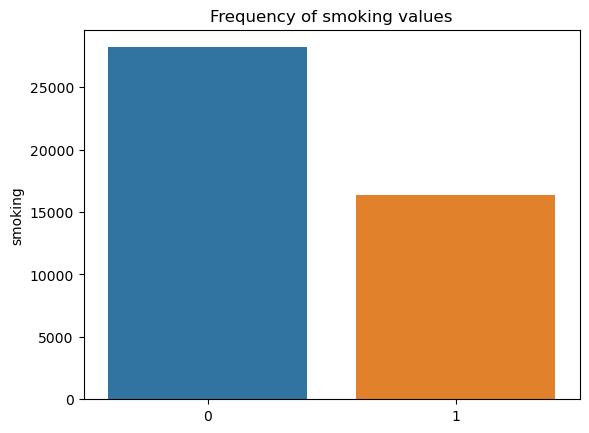

In [424]:
sns.barplot( data=y_train_val,  x=y_train_val.smoking.value_counts().index, y=y_train_val.smoking.value_counts()).set(title="Frequency of smoking values")


In [48]:
X_train_val_end.gender.value_counts()

M    28327
F    16226
Name: gender, dtype: int64

About one-third of non-smokers. Let's take our classification matrix as a **roc-auc** curve, as it is more important to reveal the ones that contain it, as in the case of diabetes data!

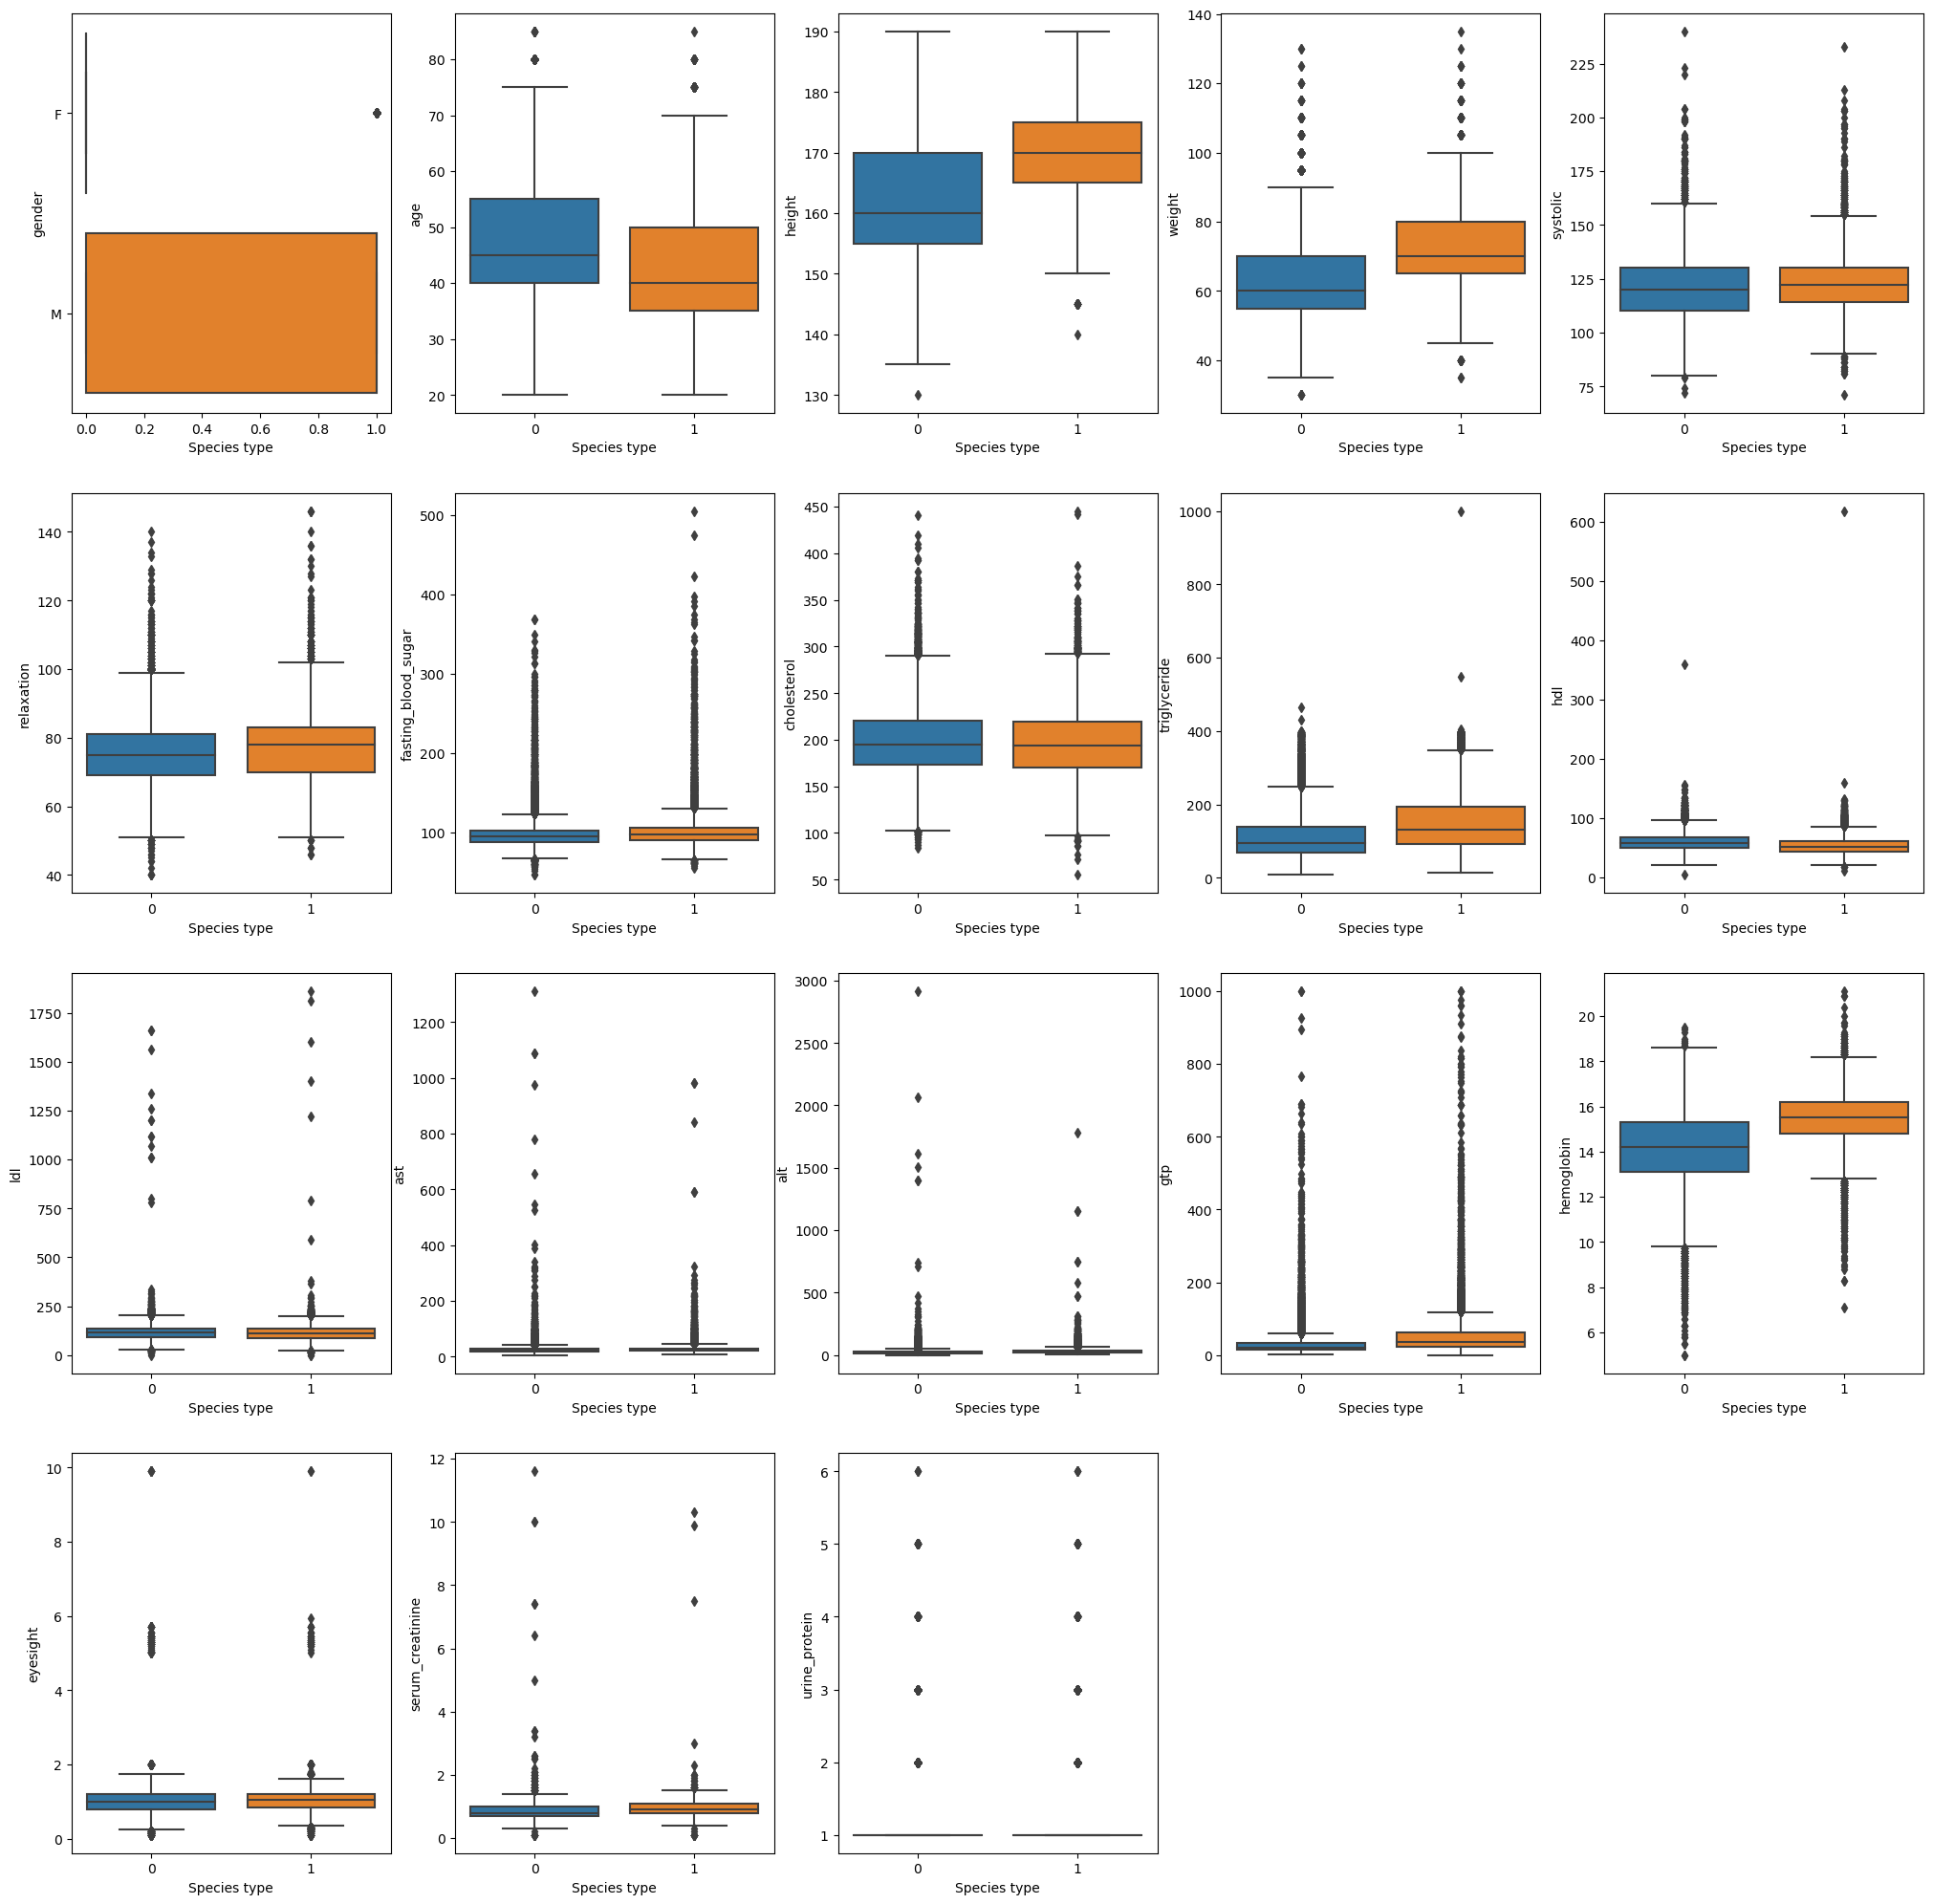

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [25, 25]



smoking_features =list(X_train_val_end.columns)


for i, feat in enumerate(smoking_features, start=1):
      
    plt.subplot(4,5,i)
    
    g = sns.boxplot(x=y_train_val.smoking, y=X_train_val_end[feat]) 
    
    g.set_xlabel('Species type')
    
    g.set_ylabel(smoking_features[(i-1)])
    
plt.show();  

It is possible to look at the boxchart above and make many comments. We can see how each feature affects the target value and outliers. In particular, there are too many outliers in some data and it can be observed that men are more dense.

In [50]:
X_train_val_end.head()

,gender,age,height,weight,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,ast,alt,gtp,hemoglobin,eyesight,serum_creatinine,urine_protein
28890,F,40,155,55,129.0,80.0,105.0,205.0,54.0,62.0,131.0,16.0,16.0,13.0,12.9,0.90,0.6,1.0
29447,M,40,170,80,138.0,86.0,93.0,178.0,63.0,50.0,115.0,34.0,37.0,29.0,16.5,0.80,1.1,1.0
8450,M,40,170,65,113.0,72.0,226.0,180.0,116.0,52.0,105.0,16.0,12.0,52.0,14.3,0.35,0.9,1.0
17118,M,25,175,75,113.0,71.0,87.0,127.0,48.0,62.0,55.0,25.0,22.0,10.0,16.5,0.75,0.9,1.0
42757,M,25,165,60,114.0,70.0,89.0,182.0,80.0,71.0,95.0,20.0,17.0,22.0,14.9,1.05,1.0,1.0


In [51]:
X_train_val_end.columns

Index(['gender', 'age', 'height', 'weight', 'systolic', 'relaxation',
       'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl',
       'ast', 'alt', 'gtp', 'hemoglobin', 'eyesight', 'serum_creatinine',
       'urine_protein'],
      dtype='object')

### Creating Model

First, let's create a pipeline. Since there are two different values, categorical and numeric, we need to perform separate operations using ColumnTransformer. When applying OneHotEncoding to categorical values, I must scale numeric values because I will use Regulation.

In [238]:
from sklearn.pipeline import make_pipeline

categorical_transformer = make_pipeline(OneHotEncoder(drop='first',sparse_output=False))
numeric_transformer = make_pipeline(StandardScaler())
preprocessor = ColumnTransformer(transformers=[('categorical', categorical_transformer, ['gender','urine_protein']),
                                              ('numerical', numeric_transformer, ['age', 'height', 'weight', 'systolic', 'relaxation',
       'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl',
       'ast', 'alt', 'gtp', 'hemoglobin', 'eyesight', 'serum_creatinine',
       'urine_protein']),])

I do not classify using Logistic Regression requested from me in my homework and I do not try different penalties in this context. There are 3 different penalties. These are L1, L2 and Elasticnet regulations. Essentially, we can define it as the combination of Elasticnet L1 and L2 at different rates. Let's dig a little deeper.

## Elastic-Net Regularization

Elastic-net arrangement is a technique used in logistic regression to balance between l1 and l2 arrangement. In this technique, both the l1 and l2 norms are combined with a hyperparameter "alpha" that controls the balance between them. At Sklearn we see this as l1_ratio. Only used if penalty='elasticnet'. Setting *l1_ratio=0* is equivalent to using *penalty='l2'*, while setting *l1_ratio=1* is equivalent to using *penalty='l1'*. For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.

Advantages of Elastic-Net:

* It can handle multi-link (associated features) high-dimensional datasets better than Lasso (l1) or Ridge (l2) regularization alone. 
* It can perform feature selection as a Lasso regularization by driving some coefficients to zero, or it can shrink the coefficients towards zero as a Ridge regularization.
* It is computationally efficient and can scale to large datasets.
* It can provide a more stable and reliable model by reducing the variance in the model.
 
Disadvantages of Elastic-Net:
* The choice of hyperparameters can be challenging.
* Interpreting the model becomes more difficult with the addition of another hyperparameter.

So we can say; The elastic mesh arrangement is a useful technique for logistic regression that balances the powers of the l1 and l2 arrangement. It is particularly useful when the dataset has many interrelated features and feature selection is important. However, careful selection of hyperparameters is required for best results.

I was reluctant to remove features that were around 0.7 in the correlation from the data. Considering the size of the data, elasticnet can do really well. We'll see:

First, let's try each regulation without changing parameters and then look for the best value with gridSearch!

In [241]:
lrl1_pipe = make_pipeline(preprocessor,  LogisticRegression(penalty="l1",solver='saga'))

lrl1_pipe.fit(X_train_val_end, y_train_val.smoking)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'urine_protein']),
                                                 ('numerical',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height', 'weight',
                                                   'systolic', 'relaxation',
                                                   'fasting_blood_sugar',
                                                   'cholesterol',
                                                   'triglyceride', 'hdl', 'ldl',
                                                   'ast', 'alt', 'gtp',
                                                   'hemoglobin', 'eyesight',
                                                   'serum_creatinine',
                                                   'urine_protein'])])),
                ('logisticregression',
                 LogisticRegression(penalty='l1', solver='saga'))])

In [199]:
features=lrl1_pipe.named_steps['logisticregression'].feature_names_in_
coef_features=lrl1_pipe.named_steps['logisticregression'].coef_

Below we can see which feature is multiplied by which coefficient and therefore the effect of the features on the estimation.


Especially since we scale the data, it would not be unreasonable to associate it with the coefficients. Negative coefficients increase the probability of non-smoking as the value of the feature increases, while positive values increase the probability of smoking as the value of the feature increases.

In [200]:
feat_coef=dict()
for i in range(len(features)):
    feat_coef[features[i]]=coef_features[0][i]
feat_coef

{'categorical__gender_M': 2.8898022157664154,
 'categorical__urine_protein_2.0': -0.1768740945968468,
 'categorical__urine_protein_3.0': -0.052397868222352935,
 'categorical__urine_protein_4.0': 0.013924805063432001,
 'categorical__urine_protein_5.0': -0.02120274694851105,
 'categorical__urine_protein_6.0': 0.014764994070998344,
 'numerical__age': -0.03891017448678627,
 'numerical__height': 0.21188070229047545,
 'numerical__weight': -0.138463080083479,
 'numerical__systolic': -0.1884738182209541,
 'numerical__relaxation': 0.08715208804893917,
 'numerical__fasting_blood_sugar': 0.07807119153915122,
 'numerical__cholesterol': -0.07145044607827551,
 'numerical__triglyceride': 0.33031736503369685,
 'numerical__hdl': 0.026319951121166283,
 'numerical__ldl': -0.007877595855140395,
 'numerical__ast': -0.027884209951001566,
 'numerical__alt': -0.17196727873301468,
 'numerical__gtp': 0.36928328713542913,
 'numerical__hemoglobin': 0.21400730671299337,
 'numerical__eyesight': -0.01971060579347864

It is possible to observe these coefficients in different penalty values as follows. I'm passing so I don't prolong it.

I will draw the roc-auc value and confusion matrix and write accuracy rate to test the model. I will run this for each penalty situation and comment the result below.

AUC-ROC: 0.8298


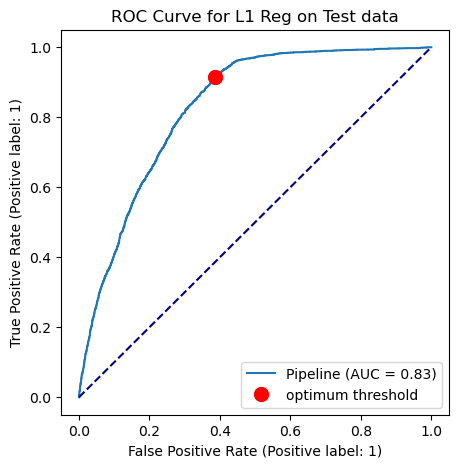

In [201]:
from sklearn.metrics import RocCurveDisplay
#calculate fpr, tpr
from sklearn.metrics import roc_curve
plt.rcParams['figure.figsize'] = [5, 5]
#y_true:True binary labels. y_score=Target scores,
fpr, tpr, thresholds = roc_curve(y_true = y_test,  y_score = lrl1_pipe.predict_proba(X_test)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_idx
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

from sklearn.metrics import auc
print('AUC-ROC: %.4f' % auc(fpr, tpr))

RocCurveDisplay.from_estimator(lrl1_pipe, X_test_end, y_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(fpr[optimal_idx],tpr[optimal_idx], "or",  markersize=10, label="optimum threshold")
plt.title("ROC Curve for L1 Reg on Test data")
plt.legend(loc="best")
plt.show();

In [242]:
print("Accuracy on test data: %.4f %%" % lrl1_pipe.score(X_test_end, y_test.smoking))

Accuracy on test data: 0.7445 %


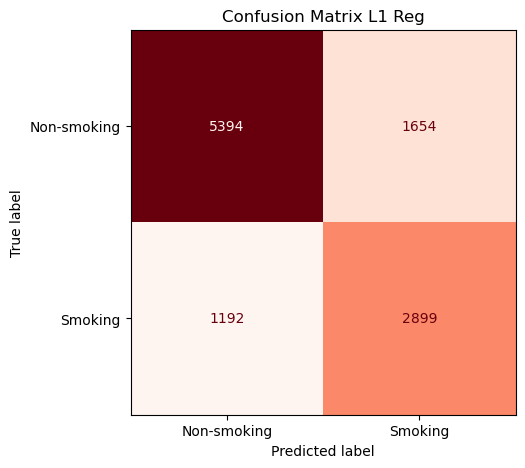

In [203]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(lrl1_pipe, 
                                           X_test_end, y_test, 
                                           display_labels=["Non-smoking","Smoking"], 
                                           cmap="Reds",
                                           colorbar=False)
                                           
cm.ax_.set_title("Confusion Matrix L1 Reg");

In [204]:
lr_pipe = make_pipeline(preprocessor,  LogisticRegression(penalty=None ,solver='saga'))

lr_pipe.fit(X_train_val_end, y_train_val.smoking)
print("Accuracy on test data: %.4f %%" % lr_pipe.score(X_test_end, y_test.smoking))

Accuracy on test data: 0.7444 %


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [205]:
lrl2_pipe = make_pipeline(preprocessor,  LogisticRegression(penalty="l2",solver='saga'))

lrl2_pipe.fit(X_train_val_end, y_train_val.smoking)
print("Accuracy on test data: %.4f %%" % lrl2_pipe.score(X_test_end, y_test.smoking))

Accuracy on test data: 0.7447 %


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


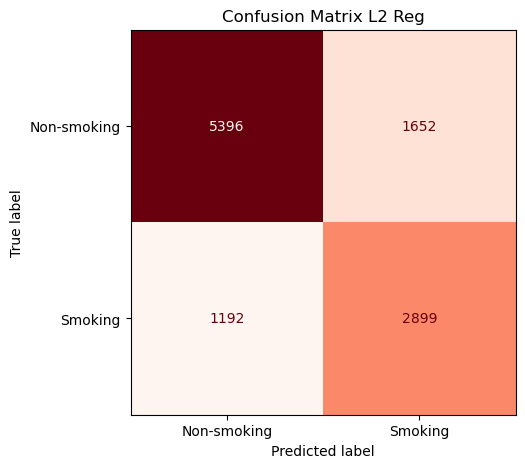

In [206]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(lrl2_pipe, 
                                           X_test_end, y_test, 
                                           display_labels=["Non-smoking","Smoking"], 
                                           cmap="Reds",
                                           colorbar=False)
                                           
cm.ax_.set_title("Confusion Matrix L2 Reg");

AUC-ROC: 0.8298


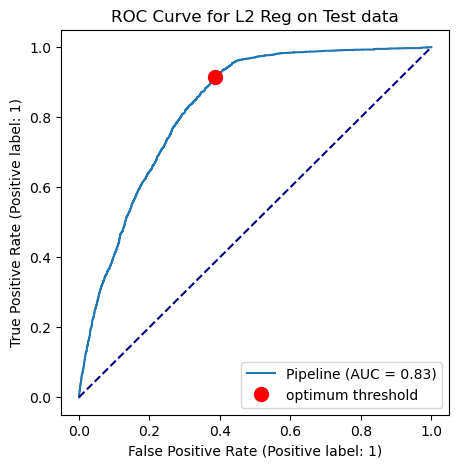

In [153]:
from sklearn.metrics import RocCurveDisplay
#calculate fpr, tpr
from sklearn.metrics import roc_curve

#y_true:True binary labels. y_score=Target scores,
fpr, tpr, thresholds = roc_curve(y_true = y_test,  y_score = lrl2_pipe.predict_proba(X_test_end)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_idx
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

from sklearn.metrics import auc
print('AUC-ROC: %.4f' % auc(fpr, tpr))

RocCurveDisplay.from_estimator(lrl2_pipe, X_test_end, y_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(fpr[optimal_idx],tpr[optimal_idx], "or",  markersize=10, label="optimum threshold")
plt.title("ROC Curve for L2 Reg on Test data")
plt.legend(loc="best")
plt.show();

In [135]:
from sklearn.pipeline import make_pipeline

categorical_transformer = make_pipeline(OneHotEncoder(drop='first',sparse_output=False))
numeric_transformer = make_pipeline(StandardScaler())
preprocessor = ColumnTransformer(transformers=[('categorical', categorical_transformer, ['gender','urine_protein']),
                                              ('numerical', numeric_transformer, ['age', 'height', 'weight', 'systolic', 'relaxation',
       'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl',
       'ast', 'alt', 'gtp', 'hemoglobin', 'eyesight', 'serum_creatinine',
       'urine_protein']),])
lrelastic_pipe = make_pipeline(preprocessor,  LogisticRegression(penalty="elasticnet",solver='saga',l1_ratio=0.7))

lrelastic_pipe.fit(X_train_val_end, y_train_val.smoking)
print("Accuracy on test data: %.4f %%" % lrelastic_pipe.score(X_test, y_test.smoking))

Accuracy on test data: 0.7445 %


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


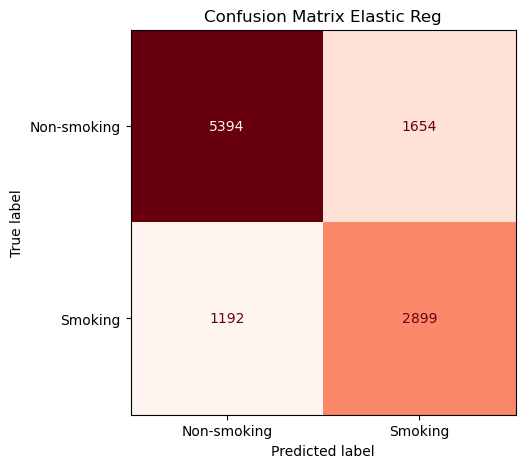

In [154]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(lrelastic_pipe, 
                                           X_test_end, y_test, 
                                           display_labels=["Non-smoking","Smoking"], 
                                           cmap="Reds",
                                           colorbar=False)
                                           
cm.ax_.set_title("Confusion Matrix Elastic Reg");

AUC-ROC: 0.8298


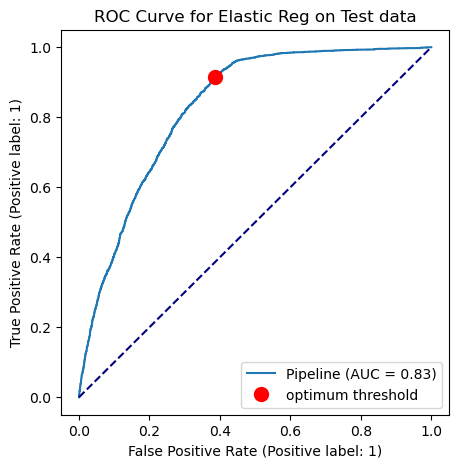

In [155]:
from sklearn.metrics import RocCurveDisplay
#calculate fpr, tpr
from sklearn.metrics import roc_curve

#y_true:True binary labels. y_score=Target scores,
fpr, tpr, thresholds = roc_curve(y_true = y_test,  y_score = lrelastic_pipe.predict_proba(X_test_end)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_idx
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

from sklearn.metrics import auc
print('AUC-ROC: %.4f' % auc(fpr, tpr))

RocCurveDisplay.from_estimator(lrelastic_pipe, X_test_end, y_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(fpr[optimal_idx],tpr[optimal_idx], "or",  markersize=10, label="optimum threshold")
plt.title("ROC Curve for Elastic Reg on Test data")
plt.legend(loc="best")
plt.show();

In [90]:
X_train_val_first.columns

Index(['gender', 'age', 'height', 'weight', 'waist', 'eyesight_left',
       'eyesight_right', 'hearing_left', 'hearing_right', 'systolic',
       'relaxation', 'fasting_blood_sugar', 'cholesterol', 'triglyceride',
       'hdl', 'ldl', 'hemoglobin', 'urine_protein', 'serum_creatinine', 'ast',
       'alt', 'gtp', 'dental_caries', 'tartar'],
      dtype='object')

In [157]:
from sklearn.pipeline import make_pipeline

categorical_transformer = make_pipeline(OneHotEncoder(drop='first',sparse_output=False))
numeric_transformer = make_pipeline(StandardScaler())
preprocessor = ColumnTransformer(transformers=[('categorical', categorical_transformer, ['gender','urine_protein','hearing_left','hearing_right','dental_caries','tartar']),
                                              ('numerical', numeric_transformer, ['age', 'height', 'weight', 'waist','systolic', 'relaxation',
       'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl',
       'ast', 'alt', 'gtp', 'hemoglobin', 'eyesight_left','eyesight_right', 'serum_creatinine']),])

In [158]:
lrl2full_pipe = make_pipeline(preprocessor,  LogisticRegression(penalty="l2",solver='saga'))

lrl2full_pipe.fit(X_train_val_first, y_train_val.smoking)
print("Accuracy on test data: %.4f %%" % lrl2full_pipe.score(X_test_first, y_test.smoking))

Accuracy on test data: 0.7480 %


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


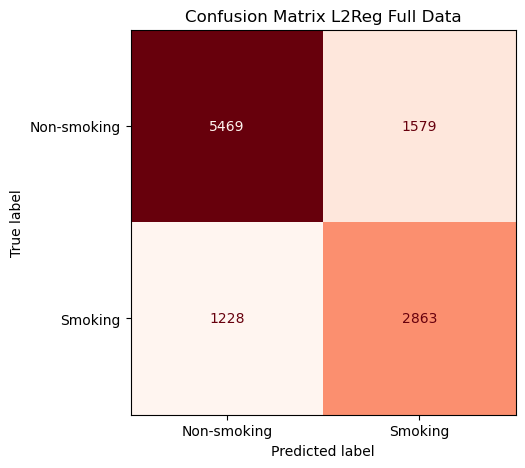

In [159]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(lrl2full_pipe, 
                                           X_test_first, y_test, 
                                           display_labels=["Non-smoking","Smoking"], 
                                           cmap="Reds",
                                           colorbar=False)
                                           
cm.ax_.set_title("Confusion Matrix L2Reg Full Data");

AUC-ROC: 0.8337


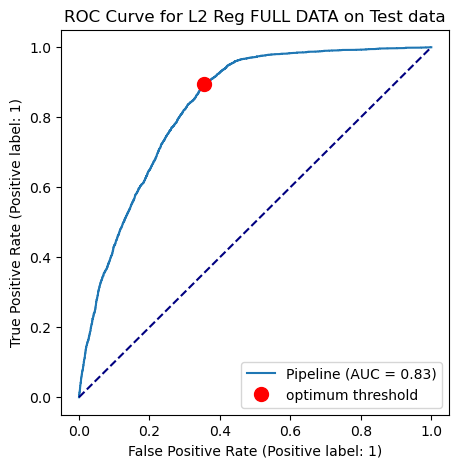

In [161]:
from sklearn.metrics import RocCurveDisplay
#calculate fpr, tpr
from sklearn.metrics import roc_curve

#y_true:True binary labels. y_score=Target scores,
fpr, tpr, thresholds = roc_curve(y_true = y_test,  y_score = lrl2full_pipe.predict_proba(X_test_first)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_idx
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

from sklearn.metrics import auc
print('AUC-ROC: %.4f' % auc(fpr, tpr))

RocCurveDisplay.from_estimator(lrl2full_pipe, X_test_first, y_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(fpr[optimal_idx],tpr[optimal_idx], "or",  markersize=10, label="optimum threshold")
plt.title("ROC Curve for L2 Reg FULL DATA on Test data")
plt.legend(loc="best")
plt.show();

### Preliminary Assessment

In [162]:
print("Accuracy on test data Penalty= None : %.4f %%" % lr_pipe.score(X_test_end, y_test.smoking))
print("Accuracy on test data Penalty= L1 Reg: %.4f %%" % lrl1_pipe.score(X_test_end, y_test.smoking))
print("Accuracy on test data Penalty= L2 Reg: %.4f %%" % lrl2_pipe.score(X_test_end, y_test.smoking))
print("Accuracy on test data Penalty= Elasticnet Reg: %.4f %%" % lrelastic_pipe.score(X_test, y_test.smoking))

Accuracy on test data Penalty= None : 0.7444 %
Accuracy on test data Penalty= L1 Reg: 0.7445 %
Accuracy on test data Penalty= L2 Reg: 0.7447 %
Accuracy on test data Penalty= Elasticnet Reg: 0.7445 %


First of all, I have to admit that I was wrong somewhere. I stated that I would go over the ROC metric as a classification metric, but I think that ROC values are the same in different penalties and it is more difficult to observe than accuracy for this data set. It is possible to see at least different accuracy values above. Therefore, I will re-set the metric to accuracy via grid_search.

Second, we see that the best value is L2. The above results give the scores of the data set reduced by a number of correlation tests. Let's test the same regulation over the first version of our data:

In [163]:
print("Accuracy on test data Penalty= L2 Reg: %.4f %%" % lrl2_pipe.score(X_test_end, y_test.smoking))
print("Accuracy on test (Full Data) data Penalty= L2 Reg: %.4f %%" % lrl2full_pipe.score(X_test_first, y_test.smoking))

Accuracy on test data Penalty= L2 Reg: 0.7447 %
Accuracy on test (Full Data) data Penalty= L2 Reg: 0.7480 %


In [166]:
len(X_train_val_end.columns)

18

In [167]:
len(X_train_val_first.columns)

24

As you can see, when we throw 6 columns directly, there is a decrease of 0.0033 in accuracy, that is, it is possible to lighten the data set without losing much of the accuracy of the model.

Also, unfortunately, there is not much difference between being regulated or not. In this case, let's continue to make sense of our model by changing the C value. Let's do this in detail on grid_search!

### Grid Search Part

I have run it before and the best ratio C is 0.33, so I want to get the C value from -4 4 ->20 to -2 2->15 in order to run it fast.

Here we are trying to find the most suitable parameters for the model with grid search. Here are the ranges we are looking for:

* Different penalty cases: none, l1, l2, elasticnet

* Different C values : np.logspace(-1,1, 20)

* If we are using elasticnet penalty, specially l1_ratio ratio: [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

### C: Inverse of regularization strength 
C was 1 by default.
The larger this parameter, the stronger the regularization and the overfitting of the model is prevented. The smaller this parameter, the weaker the regularization, allowing the model to better fit the training data.

We will observe the different values of it in the grid search. Since our model is cruising at an accuracy rate of 74%, I expect this parameter to be a little small, I think the model should adapt to the data more.

I ran the grid_search code I wrote below a few times and the C value is between 0 and 1, usually I gave this value np.logspace(-4, 4, 20) first in grid search, and finally this value is np.logspace( in order to get a better result). I'll change it to -1, 1, 15). I can also save some time grid_search takes a lot of time.

In [208]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
categorical_transformer = make_pipeline(
    OneHotEncoder(drop='first',sparse_output=False)
)
numeric_transformer = make_pipeline(StandardScaler())
preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, ['gender', 'urine_protein']),
        ('numerical', numeric_transformer, ['age', 'height', 'weight', 'systolic', 'relaxation',
       'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl',
       'ast', 'alt', 'gtp', 'hemoglobin', 'eyesight', 'serum_creatinine',
       'urine_protein'])
        
    ])

#The choice of the algorithm depends on the penalty chosen.
lr_pipe = make_pipeline(preprocessor, LogisticRegression(solver='saga'))

#Define parameter range
param_grid = [{'logisticregression__penalty' : ['elasticnet'],
               'logisticregression__C' : np.logspace(-1,1,15), 
               'logisticregression__l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
               },
              {'logisticregression__penalty' : ['l1', 'l2'],
               'logisticregression__C' : np.logspace(-1, 1, 15),
               }
             
              ]
               
#The folds are made by preserving the percentage of samples for each class.
kcv_index = StratifiedKFold(n_splits=5, shuffle=True, random_state=1404) 

grid_search = GridSearchCV(estimator = lr_pipe, param_grid = param_grid, scoring='accuracy', cv = kcv_index, return_train_score=True)

In [209]:
grid_search.fit(X_train_val_end, y_train_val.smoking)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1404, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['gender',
                                                                          'urine_protein']),
                                                                        ('numerical',
                                                                         Pipeline(steps=[('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['...
                          'logisticregression__l1_ratio': [0.1, 0.2, 0.3, 0.4,
                                                           0.5, 0.6, 0.7, 0.8,
                                                           0.9],
                          'logisticregression__penalty': ['elasticnet']},
                         {'logisticregression__C': array([ 0.1       ,  0.13894955,  0.19306977,  0.26826958,  0.37275937,
        0.51794747,  0.71968567,  1.        ,  1.38949549,  1.93069773,
        2.6826958 ,  3.72759372,  5.17947468,  7.19685673, 10.        ]),
                          'logisticregression__penalty': ['l1', 'l2']}],
             return_train_score=True, scoring='accuracy')

In [210]:
print("Optimum Model:", grid_search.best_params_)
print("CV Validation accuracy: %.2f %%" % (grid_search.best_score_*100))

Optimum Model: {'logisticregression__C': 1.3894954943731375, 'logisticregression__l1_ratio': 0.3, 'logisticregression__penalty': 'elasticnet'}
CV Validation accuracy: 73.97 %


In [211]:
grid_search.best_estimator_

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'urine_protein']),
                                                 ('numerical',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'height', 'weight',
                                                   'systolic', 'relaxation',
                                                   'fasting_blood_sugar',
                                                   'cholesterol',
                                                   'triglyceride', 'hdl', 'ldl',
                                                   'ast', 'alt', 'gtp',
                                                   'hemoglobin', 'eyesight',
                                                   'serum_creatinine',
                                                   'urine_protein'])])),
                ('logisticregression',
                 LogisticRegression(C=1.3894954943731375, l1_ratio=0.3,
                                    penalty='elasticnet', solver='saga'))])

In [212]:
print("Accuracy on train+val data: %.2f %%" % (grid_search.score(X_train_val_end, y_train_val)*100))
print("Accuracy on test data: %.2f %%" % (grid_search.score(X_test_end, y_test)*100))

Accuracy on train+val data: 73.97 %
Accuracy on test data: 74.47 %


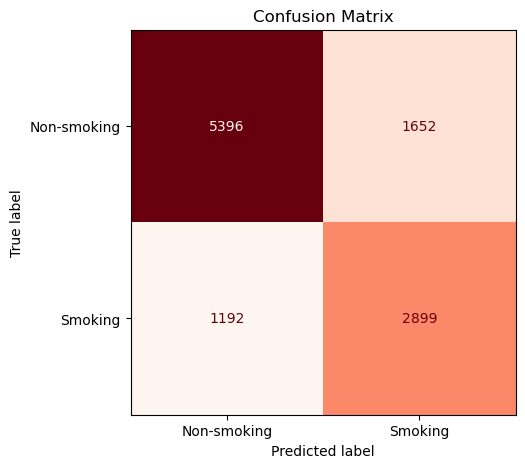

In [213]:
plt.rcParams['figure.figsize'] = [5, 5]
cm = ConfusionMatrixDisplay.from_estimator(grid_search, 
                                           X_test_end, y_test, 
                                           display_labels=["Non-smoking","Smoking"], 
                                           cmap="Reds",
                                           colorbar=False)
                                           
cm.ax_.set_title("Confusion Matrix");

As I mentioned in the pre-evaluation phase, I argued that feature reduction in the dataset is reasonable because it costs very low losses. However, then I think that the model with an accuracy value of 74% can still make sense of the features. So let's test all the data with grid search:

AUC-ROC: 0.8298


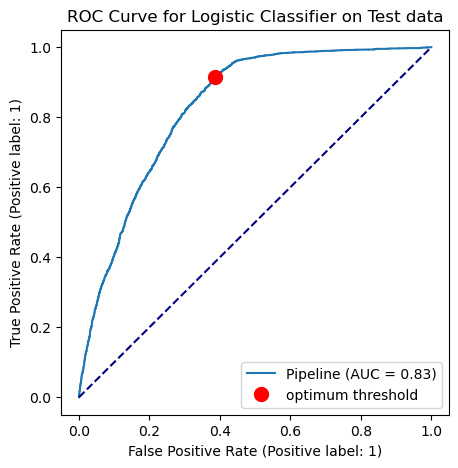

In [214]:
from sklearn.metrics import RocCurveDisplay
#calculate fpr, tpr
from sklearn.metrics import roc_curve

#y_true:True binary labels. y_score=Target scores,
fpr, tpr, thresholds = roc_curve(y_true = y_test,  y_score = grid_search.best_estimator_.predict_proba(X_test_end)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_idx
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

from sklearn.metrics import auc
print('AUC-ROC: %.4f' % auc(fpr, tpr))

RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_test_end, y_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(fpr[optimal_idx],tpr[optimal_idx], "or",  markersize=10, label="optimum threshold")
plt.title("ROC Curve for Logistic Classifier on Test data")
plt.legend(loc="best")
plt.show();

In [215]:
from sklearn.metrics import classification_report

y_test_pred = grid_search.best_estimator_.predict(X_test_end)
print(
    classification_report(
    y_test, y_test_pred, target_names=["Non-Smoking", "Smoking"]
    )
)

              precision    recall  f1-score   support

 Non-Smoking       0.82      0.77      0.79      7048
     Smoking       0.64      0.71      0.67      4091

    accuracy                           0.74     11139
   macro avg       0.73      0.74      0.73     11139
weighted avg       0.75      0.74      0.75     11139



In [223]:
from sklearn.pipeline import make_pipeline

categorical_transformer = make_pipeline(OneHotEncoder(drop='first',sparse_output=False))
numeric_transformer = make_pipeline(StandardScaler())
preprocessor = ColumnTransformer(transformers=[('categorical', categorical_transformer, ['gender','urine_protein','hearing_left','hearing_right','dental_caries','tartar']),
                                              ('numerical', numeric_transformer, ['age', 'height', 'weight', 'waist','systolic', 'relaxation',
       'fasting_blood_sugar', 'cholesterol', 'triglyceride', 'hdl', 'ldl',
       'ast', 'alt', 'gtp', 'hemoglobin', 'eyesight_left','eyesight_right', 'serum_creatinine']),])

#The choice of the algorithm depends on the penalty chosen.
lr_pipe = make_pipeline(preprocessor, LogisticRegression(solver='saga'))

#Define parameter range
param_grid = [{'logisticregression__penalty' : ['elasticnet'],
               'logisticregression__C' : np.logspace(-2, 2, 15), 
               'logisticregression__l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
               },
              {'logisticregression__penalty' : ['l1', 'l2'],
               'logisticregression__C' : np.logspace(-2, 2, 20),
               }
              ]
               
#The folds are made by preserving the percentage of samples for each class.
kcv_index = StratifiedKFold(n_splits=5, shuffle=True, random_state=1404) 

grid_search = GridSearchCV(estimator = lr_pipe, param_grid = param_grid, scoring='accuracy', cv = kcv_index, return_train_score=True)

In [224]:
grid_search.fit(X_train_val_first, y_train_val.smoking)


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1404, shuffle=True),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('categorical',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse_output=False))]),
                                                                         ['gender',
                                                                          'urine_protein',
                                                                          'hearing_left',
                                                                          'hearing_right',
                                                                          'dental_caries',
                                                                          'tartar']),
                                                                        ('numerical',...
                         {'logisticregression__C': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02]),
                          'logisticregression__penalty': ['l1', 'l2']}],
             return_train_score=True, scoring='accuracy')

In [225]:
print("Optimum Model:", grid_search.best_params_)
print("CV Validation accuracy: %.2f %%" % (grid_search.best_score_*100))

Optimum Model: {'logisticregression__C': 0.517947467923121, 'logisticregression__l1_ratio': 0.2, 'logisticregression__penalty': 'elasticnet'}
CV Validation accuracy: 74.59 %


In [230]:
print("Accuracy on train+val data: %.2f %%" % (grid_search.score(X_train_val_first, y_train_val)*100))
print("Accuracy on test data: %.2f %%" % (grid_search.score(X_test_first, y_test)*100))

Accuracy on train+val data: 74.56 %
Accuracy on test data: 74.81 %


In [226]:
from sklearn.metrics import classification_report

y_test_pred = grid_search.best_estimator_.predict(X_test_first)
print(
    classification_report(
    y_test, y_test_pred, target_names=["Non-Smoking", "Smoking"] #with optimized threshold
    )
)

              precision    recall  f1-score   support

 Non-Smoking       0.82      0.78      0.80      7048
     Smoking       0.64      0.70      0.67      4091

    accuracy                           0.75     11139
   macro avg       0.73      0.74      0.73     11139
weighted avg       0.75      0.75      0.75     11139



AUC-ROC: 0.8337


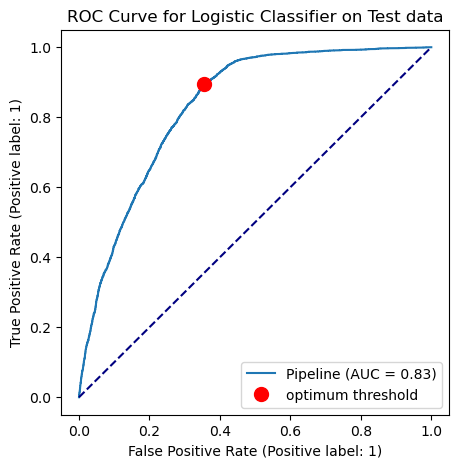

In [227]:
from sklearn.metrics import RocCurveDisplay
#calculate fpr, tpr
from sklearn.metrics import roc_curve

#y_true:True binary labels. y_score=Target scores,
fpr, tpr, thresholds = roc_curve(y_true = y_test,  y_score = grid_search.best_estimator_.predict_proba(X_test_first)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_idx
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

from sklearn.metrics import auc
print('AUC-ROC: %.4f' % auc(fpr, tpr))

RocCurveDisplay.from_estimator(grid_search.best_estimator_, X_test_first, y_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(fpr[optimal_idx],tpr[optimal_idx], "or",  markersize=10, label="optimum threshold")
plt.title("ROC Curve for Logistic Classifier on Test data")
plt.legend(loc="best")
plt.show();

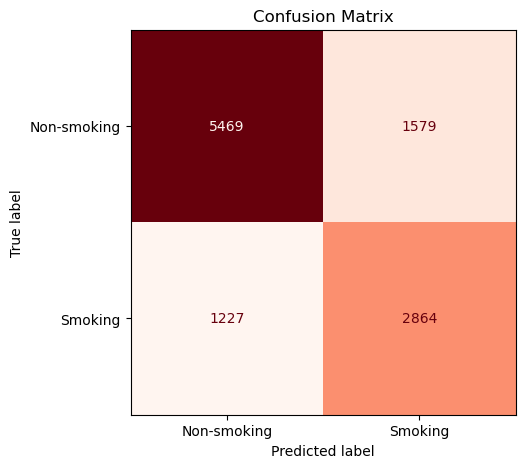

In [229]:
plt.rcParams['figure.figsize'] = [5, 5]
cm = ConfusionMatrixDisplay.from_estimator(grid_search, 
                                           X_test_first, y_test, 
                                           display_labels=["Non-smoking","Smoking"], 
                                           cmap="Reds",
                                           colorbar=False)
                                           
cm.ax_.set_title("Confusion Matrix");

### Conclusion

First of all, the data is very large, so many things that I thought would be effective did not affect the data. I definitely think that the outlier should be detected because the model seems to learn more and does not converge, at least according to the warnings.

Since the data is very large, the accuracy is different, even though the dataset is different than when the first feature selection was not made. It cannot be said that there is a huge difference and I think it would be more appropriate to remove unnecessary data in a large dataset of this size.

Finally, the model detects smoking with 74% accuracy. It can be said that it gets the best result in this area with a value of ': 0.518 on ELASTICNET regulation.

I think Roc is a better classifier metric than accuracy when the data is not evenly distributed, but unfortunately it was very difficult for me to observe ROC here. For this reason, I changed the grid search score to accuracy, so I could observe more easily.

In [85]:
import session_info
session_info.show()